# Univariate Analysis on Numerical Columns: Descriptive Statistics

In [32]:
# Do the necessary imports
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# We load the pickle file so we have the correct data type

# Here I load the **pickle file** that was saved in previous steps
# df = pd.read_pickle('data_MPG_clean.pkl')

 # Or start with CSV file
df = pd.read_csv("data_MPG.csv") # or use this. CSV does not preserve data structures, types

In [34]:
# print 10 sample values

print(df.sample(10))

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
178  23.0          4         120.0        88.0    2957          17.0   
386  25.0          6         181.0       110.0    2945          16.4   
367  28.0          4         112.0        88.0    2605          19.6   
265  17.5          8         318.0       140.0    4080          13.7   
317  34.3          4          97.0        78.0    2188          15.8   
98   16.0          6         250.0       100.0    3278          18.0   
130  26.0          4         122.0        80.0    2451          16.5   
356  32.4          4         108.0        75.0    2350          16.8   
231  15.5          8         400.0       190.0    4325          12.2   
175  29.0          4          90.0        70.0    1937          14.0   

     model_year  origin                   name  
178          75  europe            peugeot 504  
386          82     usa  buick century limited  
367          82     usa     chevrolet cavalier  
265        

In [35]:
# lets see data types and memory usage

print(df.info(memory_usage="deep"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 74.0 KB
None


## Identify numeric columns

In [36]:
# Lets identify numeric columns

# numeric_cols = df.select_dtypes(include='number').columns.tolist() # based on data type
numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'] # manually pick few numeric columns 

print(numeric_cols)

['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


In [37]:
# print few records from numeric columns

print("\nnumeric df:\n",df[numeric_cols].head(5))


numeric df:
     mpg  displacement  horsepower  weight  acceleration
0  18.0         307.0       130.0    3504          12.0
1  15.0         350.0       165.0    3693          11.5
2  18.0         318.0       150.0    3436          11.0
3  16.0         304.0       150.0    3433          12.0
4  17.0         302.0       140.0    3449          10.5


## Descriptive stats

In [38]:
# Display the descriptive stats
numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

print(df[numeric_cols].describe())

              mpg  displacement  horsepower       weight  acceleration
count  398.000000    398.000000  392.000000   398.000000    398.000000
mean    23.514573    193.425879  104.469388  2970.424623     15.568090
std      7.815984    104.269838   38.491160   846.841774      2.757689
min      9.000000     68.000000   46.000000  1613.000000      8.000000
25%     17.500000    104.250000   75.000000  2223.750000     13.825000
50%     23.000000    148.500000   93.500000  2803.500000     15.500000
75%     29.000000    262.000000  126.000000  3608.000000     17.175000
max     46.600000    455.000000  230.000000  5140.000000     24.800000


# Lets understand above on mpg: 
### **Empirical rule: (68–95–99.7 rule)**
- **68%   of data lies within ±1 standard deviations of the mean**
- **95%   of data falls within ±2 standard deviations of the mean**
- **99.7% of data falls within ±3 standard deviations of the mean**


In [60]:
# 1) for mpg, mean=23.5, std_dev=7.8

print(23.5 - 1*7.8, 23.5 + 1*7.8) # within 1 std dev
print(23.5 - 2*7.8, 23.5 + 2*7.8) # within 2 std dev
print(23.5 - 3*7.8, 23.5 + 3*7.8) # within 3 std dev

# 68%   of data has mpg between 15.7 and 31.3 
# 95%   of data has mpg between 7.9 and 39.1
# 99.7% of data has mpg between 0.1 and 46.9

15.7 31.3
7.9 39.1
0.10000000000000142 46.9


In [40]:
# 2) Look at mpg data. You will see approx. 68% of mpg data between 15.7 and 31.3.
mpg = sorted(list(df['mpg']))
print(mpg)

[9.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.5, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.5, 15.5, 15.5, 15.5, 15.5, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.2, 16.5, 16.5, 16.5, 16.9, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.5, 17.5, 17.5, 17.5, 17.5, 17.6, 17.6, 17.7, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.1, 18.1, 18.2, 18.5, 18.5, 18.5, 18.6, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.1, 19.2, 19.2, 19.2, 19.4, 19.4, 19.8, 19.9, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.2, 20.2, 20.2, 20.2, 20.3, 20.5, 20.5

describe():
 count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64


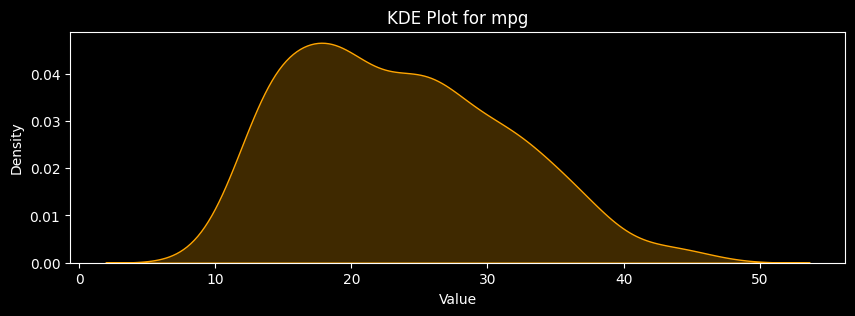

In [41]:
# 3) Verify above on Kernel Density Estimation (KDE) Curve

print("describe():\n", df["mpg"].describe())

plt.style.use("dark_background")
plt.figure(figsize=(10, 3))

sns.kdeplot(data=df, x='mpg', fill=True, color='orange')

plt.title(f'KDE Plot for mpg')
plt.xlabel('Value')
plt.ylabel('Density')

plt.show()

### For mpg, the 25th percentile is Q1=17.5
This means that 25% of the data has mpg < 17.5

### For mpg, the 50th percentile is Q2=23
This means that 50% of the data has mpg < 23

### The range of mpg is min=9 to max=46.6

In [42]:
# 1) Look at mpg data to visually verify above

mpg = sorted(list(df['mpg']))

print(mpg)

[9.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.5, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.5, 15.5, 15.5, 15.5, 15.5, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.2, 16.5, 16.5, 16.5, 16.9, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.5, 17.5, 17.5, 17.5, 17.5, 17.6, 17.6, 17.7, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.1, 18.1, 18.2, 18.5, 18.5, 18.5, 18.6, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.1, 19.2, 19.2, 19.2, 19.4, 19.4, 19.8, 19.9, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.2, 20.2, 20.2, 20.2, 20.3, 20.5, 20.5

# min / max

In [62]:
numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

print("min:\n", df[numeric_cols].min())
print("max:\n", df[numeric_cols].max())

min:
 mpg                9.0
displacement      68.0
horsepower        46.0
weight          1613.0
acceleration       8.0
dtype: float64
max:
 mpg               46.6
displacement     455.0
horsepower       230.0
weight          5140.0
acceleration      24.8
dtype: float64


# Variance / Standard Deviation

In [64]:
numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

# print(df[numeric_cols].var())
print(df[numeric_cols].std())

mpg               7.815984
displacement    104.269838
horsepower       38.491160
weight          846.841774
acceleration      2.757689
dtype: float64


# Percentile
- For **mpg**, the 50th percentile is 23. **It means that 25% of data has mpg < 23**

In [66]:
numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

print(df[numeric_cols].quantile(0.50))   # 50th percentile (Median)

# print(df[numeric_cols].quantile(0.75))   # 75th percentile
# print(df[numeric_cols].quantile(0.90))   # 90th percentile

mpg               23.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
Name: 0.5, dtype: float64


In [68]:
print(df[numeric_cols].quantile([0.25, 0.50, 0.75]))

       mpg  displacement  horsepower   weight  acceleration
0.25  17.5        104.25        75.0  2223.75        13.825
0.50  23.0        148.50        93.5  2803.50        15.500
0.75  29.0        262.00       126.0  3608.00        17.175


## median

In [69]:
numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

print(df[numeric_cols].median())

mpg               23.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
dtype: float64


## Mode

In [72]:
# 1)
cols = ['cylinders', 'model_year']

print(df[cols].mode())
# print(df["cylinders"].mode())

   cylinders  model_year
0          4          73


In [49]:
# 2)
print(df['cylinders'].value_counts())

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64


In [50]:
# 3)
print(df['model_year'].value_counts())

model_year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64


# Display all stats

In [73]:
numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

print(df[numeric_cols].agg(
    ['count', 'mean', 'median', 'std', 'var', 'min', 'max']
))

               mpg  displacement   horsepower         weight  acceleration
count   398.000000    398.000000   392.000000     398.000000    398.000000
mean     23.514573    193.425879   104.469388    2970.424623     15.568090
median   23.000000    148.500000    93.500000    2803.500000     15.500000
std       7.815984    104.269838    38.491160     846.841774      2.757689
var      61.089611  10872.199152  1481.569393  717140.990526      7.604848
min       9.000000     68.000000    46.000000    1613.000000      8.000000
max      46.600000    455.000000   230.000000    5140.000000     24.800000


# STOP